# Linear Regression

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [39]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab2_Individual_Files/Sabrina/Training_and_Test_Set.csv') # read in the csv %%file

In [40]:
crime.head()

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,PRCP,...,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event,count_cmplnt
0,11/26/2014,Morning,Wednesday,November,26,2014,Fall,66,QUEENS,1.24,...,34,51,2250002,40997,Medium,NaN,NaN,0,0,1
1,12/1/2014,Late Night,Monday,December,1,2014,Winter,60,QUEENS,0.09,...,42,65,2250002,40997,Medium,NaN,NaN,0,0,1
2,11/10/2015,Morning,Tuesday,November,10,2015,Fall,15,BROOKLYN,0.26,...,51,57,2552911,43915,High,NaN,NaN,0,0,2
3,2/4/2014,Morning,Tuesday,February,4,2014,Winter,48,QUEENS,0.00,...,22,35,2250002,40997,Medium,NaN,NaN,0,0,3
4,8/25/2015,Late Night,Tuesday,August,25,2015,Summer,35,BROOKLYN,0.00,...,73,90,2552911,43915,High,NaN,NaN,0,0,1


In [41]:
# perform one-hot encoding of the categorical data 
tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Hm_Sls_Price_Range')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [42]:
#Now we drop the original variables
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'Hm_Sls_Price_Range' in crime:    
    del crime['Hm_Sls_Price_Range'] # get rid of the original category as it is now one-hot encoded

In [43]:
#binary Y/N converted to Is Holiday or Is Event.  Can drop originals
if 'Holiday' in crime:    
    del crime['Holiday']
if 'Event' in crime:    
    del crime['Event']

In [44]:
from sklearn.model_selection import ShuffleSplit

if 'count_cmplnt' in crime:
    y = crime['count_cmplnt'] # get the labels we want
    del crime['count_cmplnt'] # get rid of the class label
    X = crime.values # use everything else to predict!
    
X = crime.drop('CMPLNT_FR_DT', axis=1) #dropping this because I have day, month and year as columns

In [45]:
#check datatypes for conversions needed
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170650 entries, 0 to 170649
Data columns (total 51 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Day                               170650 non-null  int64  
 1   Year                              170650 non-null  int64  
 2   GeoCell                           170650 non-null  int64  
 3   PRCP                              170650 non-null  float64
 4   SNOW                              170650 non-null  float64
 5   TMIN                              170650 non-null  int64  
 6   TMAX                              170650 non-null  int64  
 7   Population                        170650 non-null  int64  
 8   PC_INCOME                         170650 non-null  int64  
 9   is_Holiday                        170650 non-null  int64  
 10  is_Event                          170650 non-null  int64  
 11  BORO_NM_BRONX                     170650 non-null  u

In [46]:
y.describe()

count    170650.000000
mean          4.714122
std           5.140051
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max         132.000000
Name: count_cmplnt, dtype: float64

In [47]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=0)

In [48]:
# the indices are the rows used for training and testing in each iteration
#for train_indices, test_indices in cv_object.split(X,y): 
#    # I will create new variables here so that it is more obvious what 
#    # the code is doing (you can compact this syntax and avoid duplicating memory,
#    # but it makes this code less readable)
#    X_train = X[train_indices]
#    y_train = y[train_indices]
#    
#    X_test = X[test_indices]
#    y_test = y[test_indices]

In [49]:
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 

In [50]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults


In [51]:
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = LinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [52]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [53]:
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X, y, cv)

The average MAE for all cv folds is: 			 3.142
The average MAE percentage (MAPE) for all cv folds is: 	 124.78
The average RMSE for all cv folds is: 			 4.5832
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.124101,124.761171,4.529424
1,3.162885,125.349461,4.619970
2,3.090418,123.418469,4.568485
3,3.145296,125.423979,4.532882
4,3.182328,125.392895,4.661333
5,3.126304,122.497441,4.534450
6,3.145072,126.952563,4.581990
7,3.152822,123.560703,4.634324
8,3.171695,124.848679,4.653639
9,3.119182,125.609772,4.515929


#### test model against holdout set

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
crime_holdout = pd.read_csv('Hold_Out_Set.csv') # read in the csv %%file
crime_holdout.head()

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,PRCP,...,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event,count_cmplnt
0,11/5/2014,Evening,Wednesday,November,5,2014,Fall,16,BROOKLYN,0.0,...,56,64,2552911,41399,High,NaN,NaN,0,0,4
1,12/21/2014,Night,Sunday,December,21,2014,Winter,36,BROOKLYN,0.0,...,31,36,2552911,41399,High,NaN,NaN,0,0,14
2,10/11/2015,Morning,Sunday,October,11,2015,Fall,88,BRONX,0.0,...,53,69,1385108,32778,Low,NaN,NaN,0,0,4
3,5/10/2015,Night,Sunday,May,10,2015,Spring,56,MANHATTAN,0.0,...,61,83,1585873,155779,Very High,NaN,NaN,0,0,1
4,12/10/2015,Late Night,Thursday,December,10,2015,Winter,59,QUEENS,0.0,...,51,60,2250002,44031,Medium,NaN,NaN,0,0,1


In [70]:
# perform one-hot encoding of the categorical data 
tmp_df = pd.get_dummies(crime_holdout.BORO_NM,prefix='BORO_NM')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime_holdout.Day_Name,prefix='Day_Name')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime_holdout.Month,prefix='Month')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime_holdout.Season,prefix='Season')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime_holdout.Daytime,prefix='Daytime')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime_holdout.Daytime,prefix='Hm_Sls_Price_Range')
crime_holdout = pd.concat((crime_holdout,tmp_df),axis=1) # add back into the dataframe

In [71]:
#Now we drop the original variables
if 'BORO_NM' in crime_holdout:    
    del crime_holdout['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime_holdout:    
    del crime_holdout['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime_holdout:    
    del crime_holdout['Month'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime_holdout:    
    del crime_holdout['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime_holdout:    
    del crime_holdout['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'Hm_Sls_Price_Range' in crime_holdout:    
    del crime_holdout['Hm_Sls_Price_Range'] # get rid of the original category as it is now one-hot encoded

In [72]:
#binary Y/N converted to Is Holiday or Is Event.  Can drop originals
if 'Holiday' in crime_holdout:    
    del crime_holdout['Holiday']
if 'Event' in crime_holdout:    
    del crime_holdout['Event']
if 'CMPLNT_FR_DT' in crime_holdout:    
    del crime_holdout['CMPLNT_FR_DT']

In [73]:
from sklearn.model_selection import ShuffleSplit

if 'count_cmplnt' in crime_holdout:
    y_holdout = crime_holdout['count_cmplnt'] # get the labels we want
    del crime_holdout['count_cmplnt'] # get rid of the class label
    X_holdout = crime_holdout.values # use everything else to predict!
    

In [74]:
y_holdout_pred = regEstimator.predict(X_holdout)

In [75]:
from sklearn.metrics import *
print('Mean Absolute Error', mean_absolute_error(y_holdout, y_holdout_pred),'crimes per period')
print('Root Mean Squared Error:', mean_squared_error(y_holdout,y_holdout_pred, squared=False),'crimes per period')
print('r2:',r2_score(y_holdout,y_holdout_pred))

Mean Absolute Error 3.1117755067258623 crimes per period
Root Mean Squared Error: 4.496970184722532 crimes per period
r2: 0.21893418211880167


In [86]:
#Understanding coefficients
coefficient_df = pd.DataFrame({'variable': X.columns.values, 'weights' : regEstimator.coef_})
coefficient_df.sort_values(by='weights')

,variable,weights
12,BORO_NM_BROOKLYN,-88.665861
14,BORO_NM_QUEENS,-44.935666
1,Year,-0.251344
3,PRCP,-0.224109
9,is_Holiday,-0.133849
10,is_Event,-0.109216
4,SNOW,-0.070480
0,Day,-0.006918
8,PC_INCOME,0.000042
7,Population,0.000155


In [79]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = regEstimator.feature_importances_.ravel()
feature_names = X.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

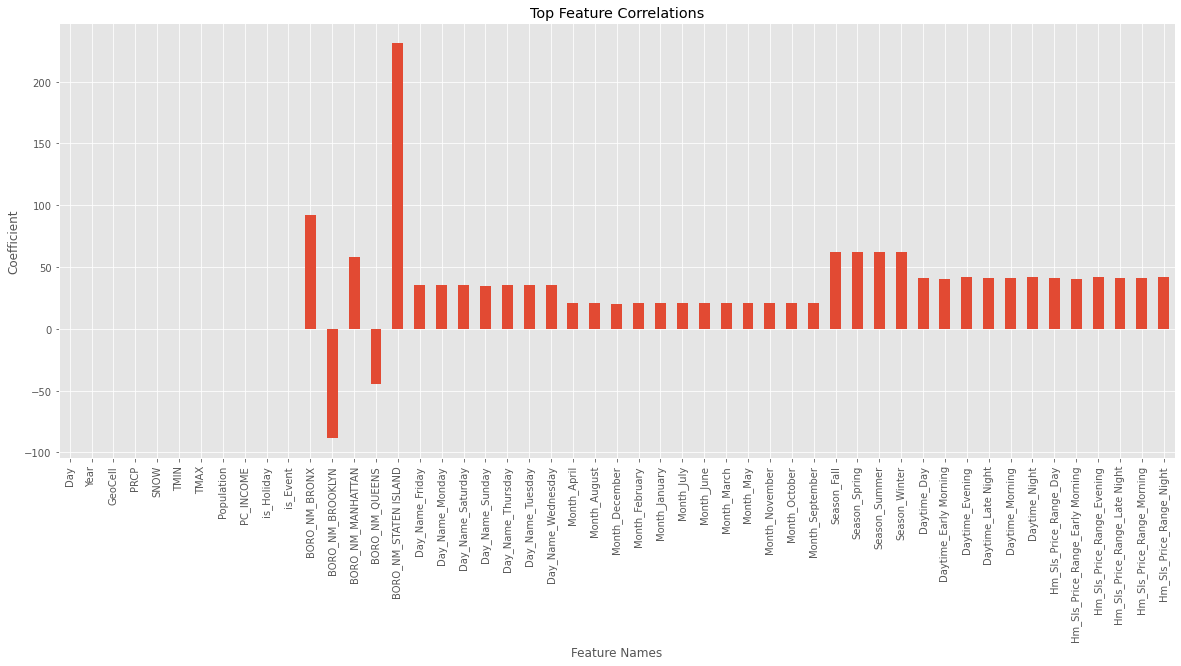

In [88]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = coefficient_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['variable'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient")
ax.set_xlabel("Feature Names")
plt.show()